# Kiva Crowd-Funding Data Visualization

In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_style('darkgrid', {
    'font_scale': '1.3',
    "axes.facecolor": ".9"
    }
)

In [2]:
%run narcos/kiva_data.py
kiva_data = KivaData(use_sample=False)
loan_data = kiva_data.loan_data

# Summary Statistics

### By Sector
By sector, the wholesale has highest median loan amount but very few loans. Agiculture, food and retail rank top 3 in term of number of loans.

In [3]:
len(loan_data.borrower_genders.unique())

11299

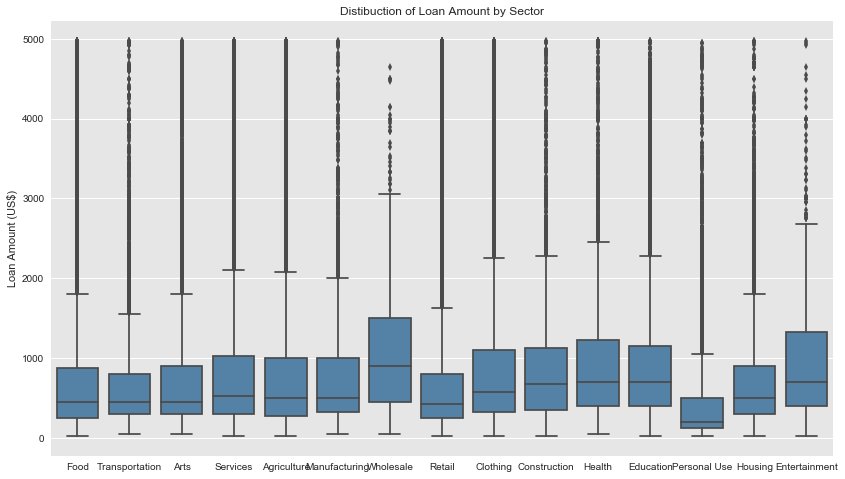

In [4]:
%run narcos/sector_boxplot.py
sector_boxplot(loan_data)

            sector  loan_amount  loan_ranked
0      Agriculture  143067875.0         15.0
1             Arts   12240325.0          7.0
2         Clothing   37300925.0         11.0
3     Construction    6695150.0          4.0
4        Education   30968525.0         10.0
5    Entertainment    1389150.0          2.0
6             Food  121606150.0         14.0
7           Health    9843400.0          5.0
8          Housing   23663950.0          9.0
9    Manufacturing    5447900.0          3.0
10    Personal Use   14955350.0          8.0
11          Retail   98122900.0         13.0
12        Services   48057450.0         12.0
13  Transportation   11066900.0          6.0
14       Wholesale     995200.0          1.0


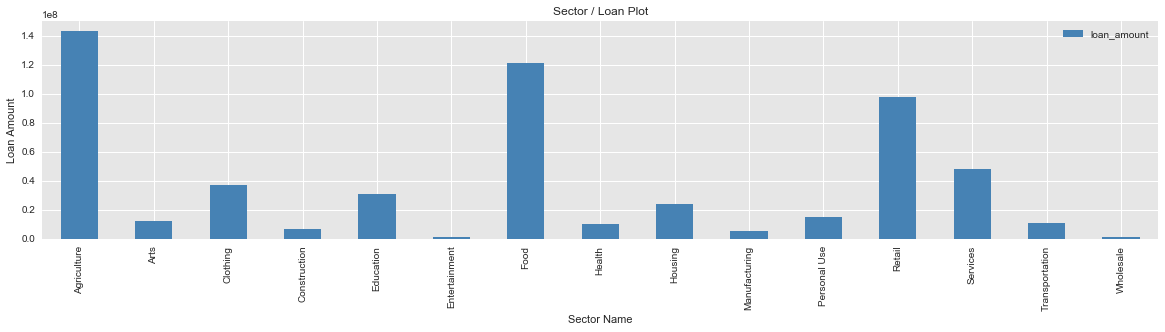

In [5]:
%run narcos/sector_by_loan.py
plot_sector_by_loan_amount(loan_data)

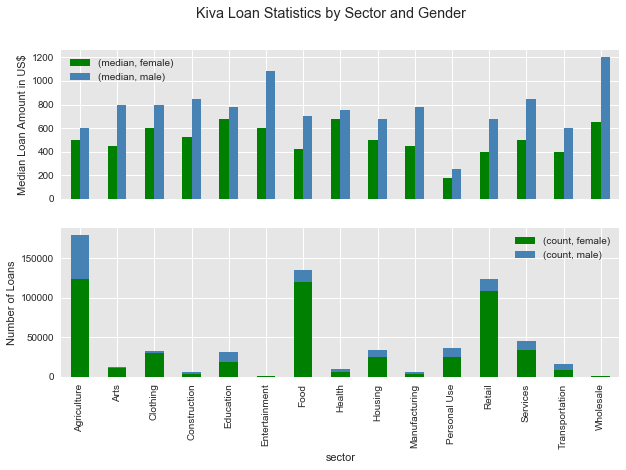

In [32]:
%run narcos/sector_bar.py
sector_bar(loan_data)

### By Country (and Gender)

                             country  loan_amount  loan_ranked
0                        Afghanistan      14000.0          4.0
1                             Belize     114025.0         10.0
2                             Bhutan      20000.0          6.0
3                              Chile     122650.0         12.0
4                              China     380525.0         18.0
5                      Cote D'Ivoire      50000.0          9.0
6                               Guam       4300.0          1.0
7                            Lesotho     359525.0         16.0
8                         Mauritania      15000.0          5.0
9                            Namibia      32375.0          7.0
10                             Nepal     307625.0         15.0
11                            Panama     273275.0         14.0
12                       Puerto Rico     371400.0         17.0
13  Saint Vincent and the Grenadines      49225.0          8.0
14                           Somalia     225875.0      

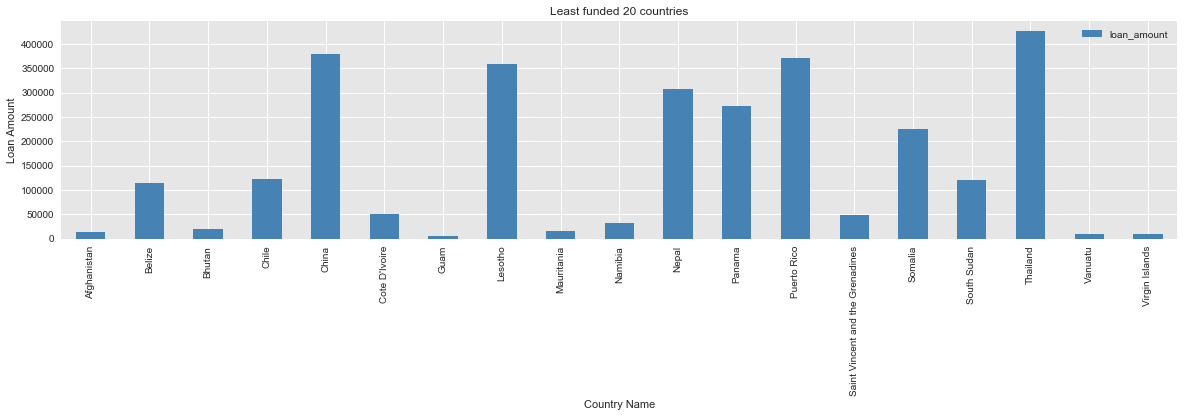

In [7]:
%run narcos/country_by_loan.py
plot_country_by_loan_amount(loan_data)

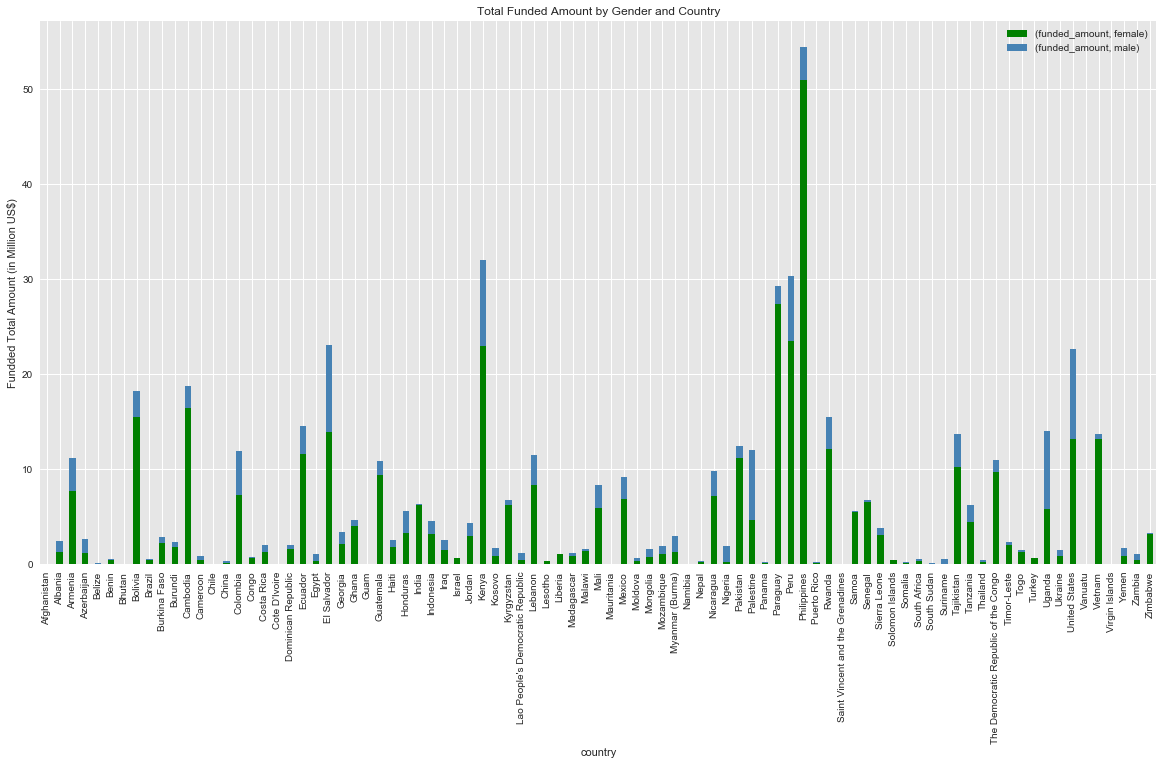

In [8]:
figure, ax = plt.subplots(figsize=(20,10))
(loan_data.groupby(
       ['country', 'gender']
    )[['funded_amount']].sum() / (1000 * 1000 )).reset_index().pivot(
    index='country', columns='gender'
).plot.bar(
    stacked=True,
    color=['green', 'steelblue'],
    ax=ax
)
ax.legend(title='')
plt.ylabel('Fundded Total Amount (in Million US$)')
plt.title('Total Funded Amount by Gender and Country')
plt.show()

### By Replayment Interval

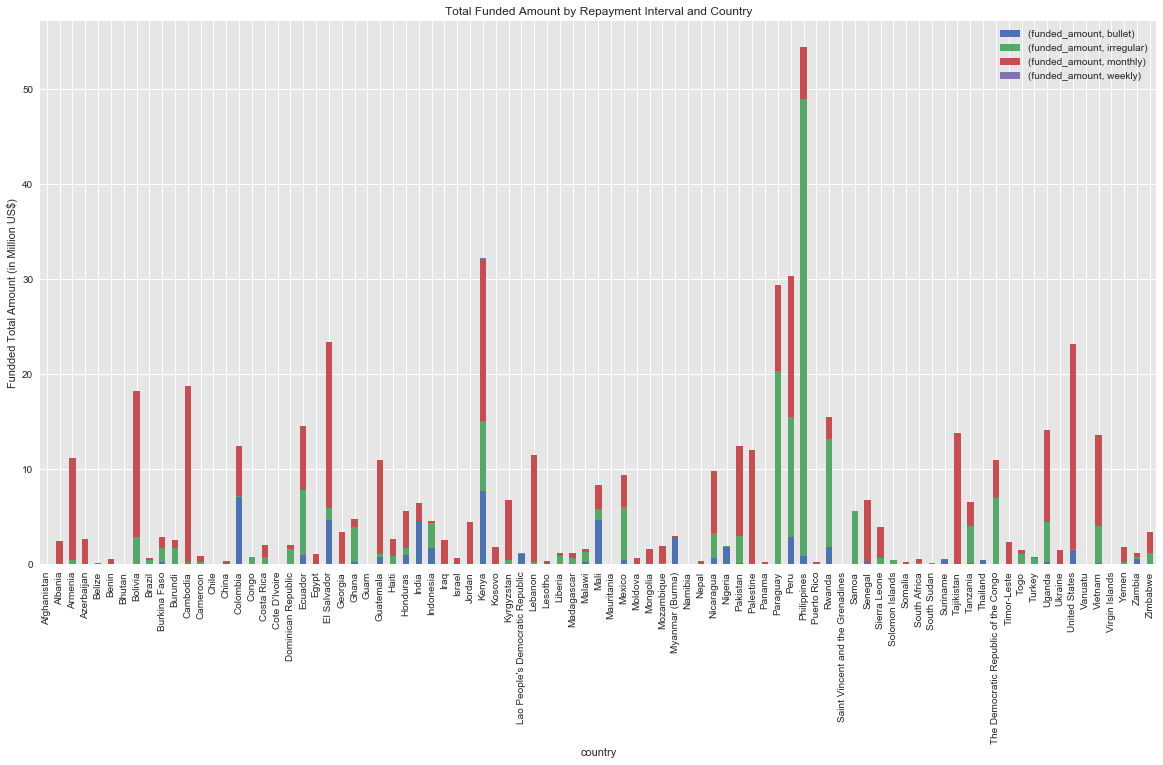

In [9]:
figure, ax = plt.subplots(figsize=(20,10))
(loan_data.groupby(
       ['country', 'repayment_interval']
    )[['funded_amount']].sum() / (1000 * 1000 )).reset_index().pivot(
    index='country', columns='repayment_interval'
).plot.bar(
    stacked=True,
    ax=ax
)
plt.legend(title='')
plt.ylabel('Fundded Total Amount (in Million US$)')
plt.title('Total Funded Amount by Repayment Interval and Country')
plt.show()

## By Sector

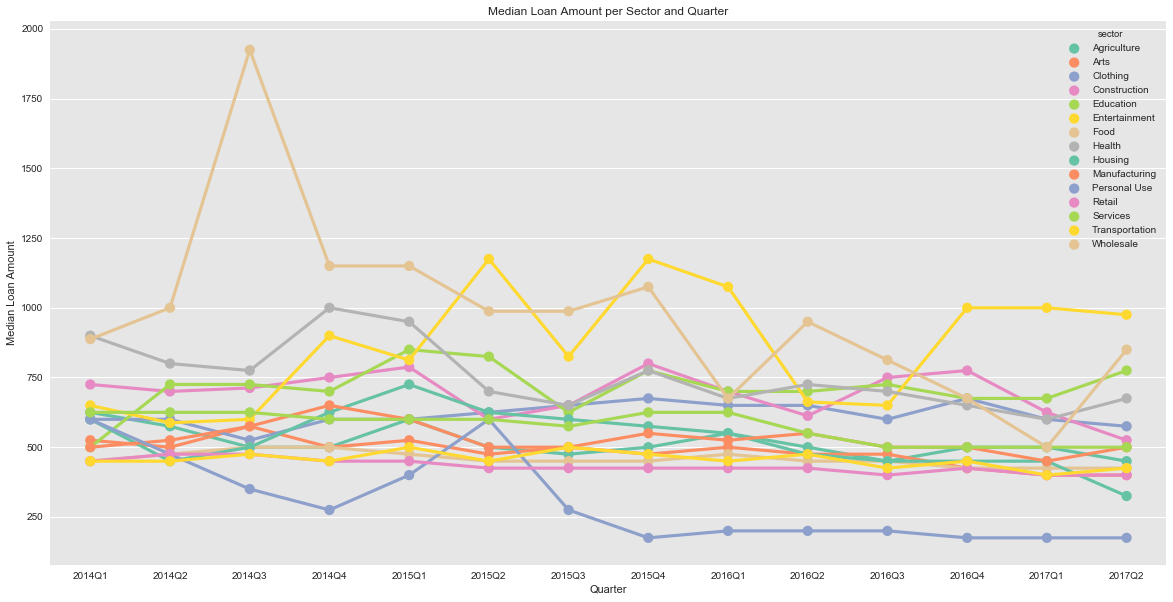

In [10]:
%run narcos/median_amount_per_sector.py
median_amount_per_sector(loan_data)

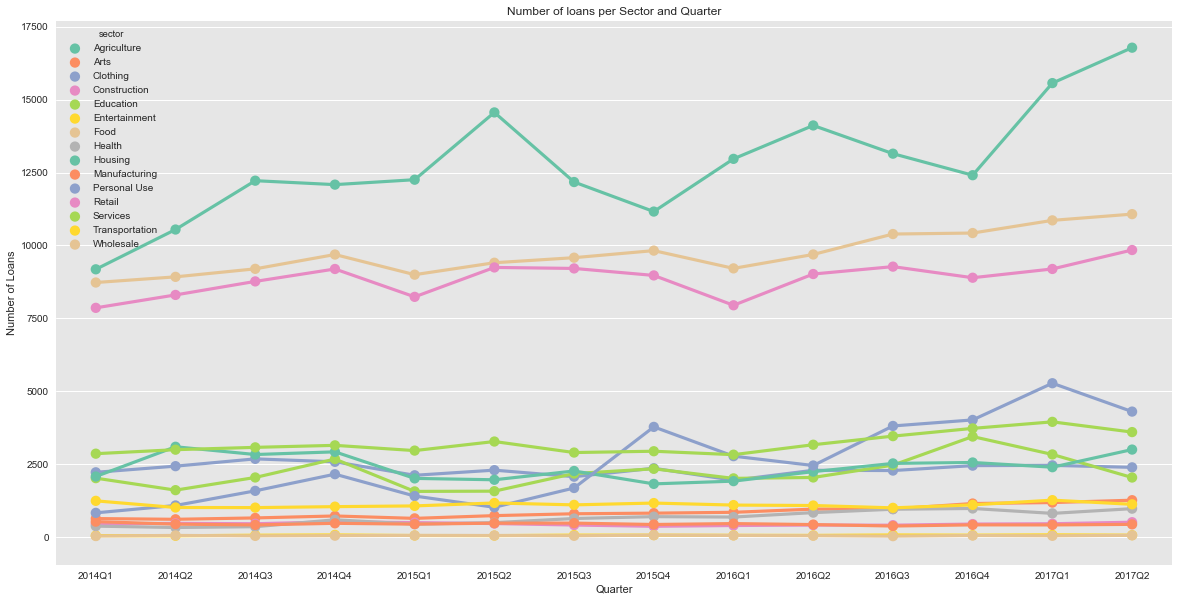

In [11]:
%run narcos/number_loans_per_sector.py
number_loans_per_sector(loan_data)

## Trend Over Time

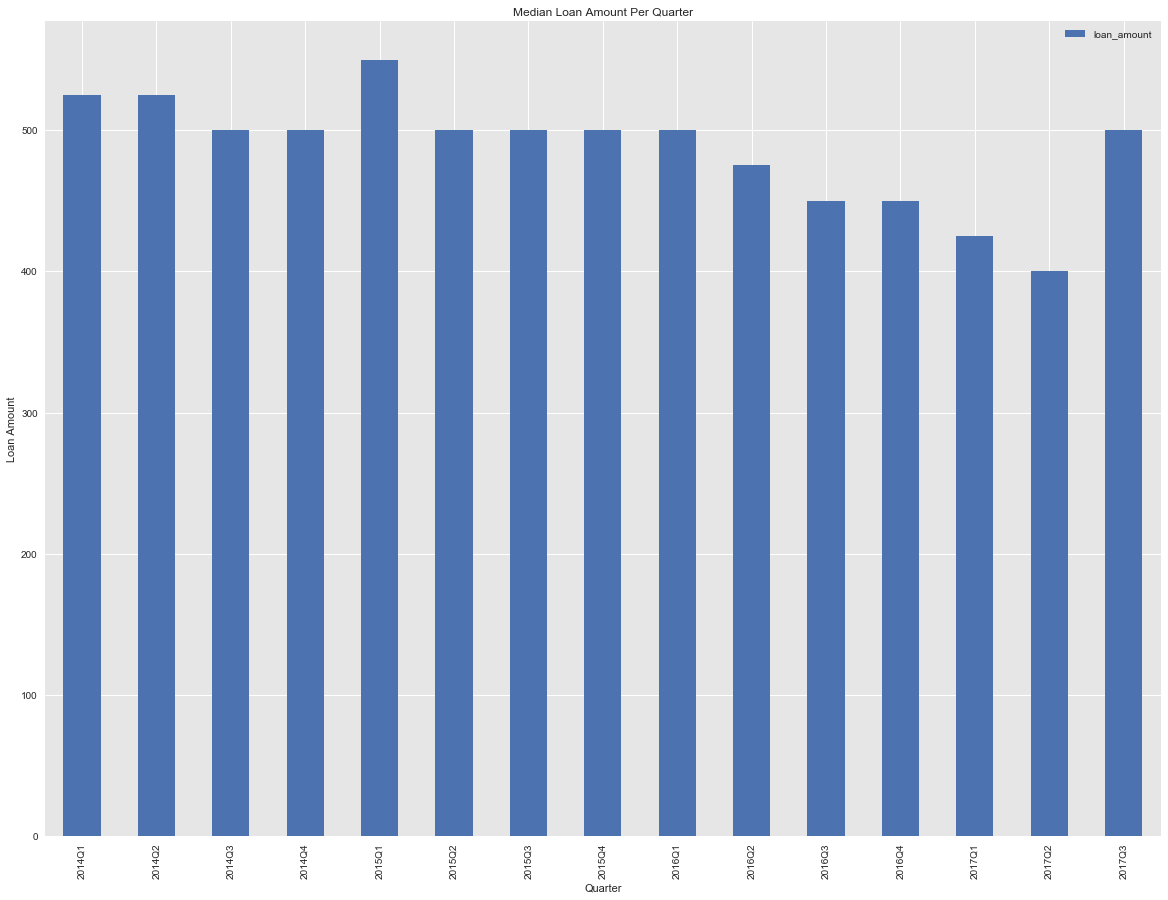

In [12]:
%run narcos/median_amount_per_quarter.py
median_amount_per_quarter(loan_data)

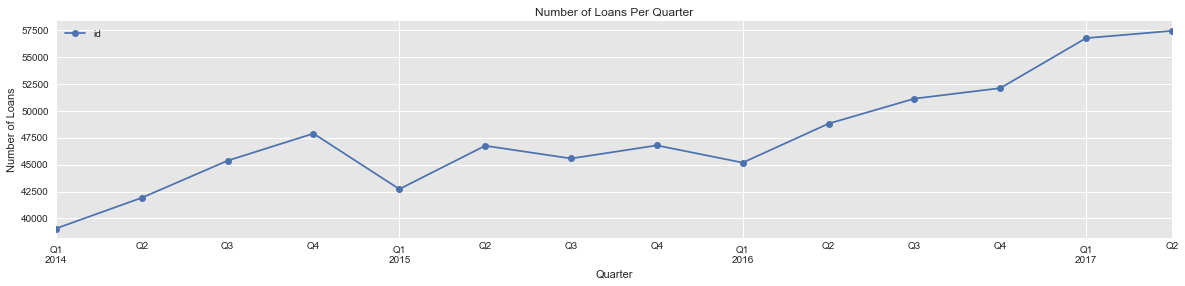

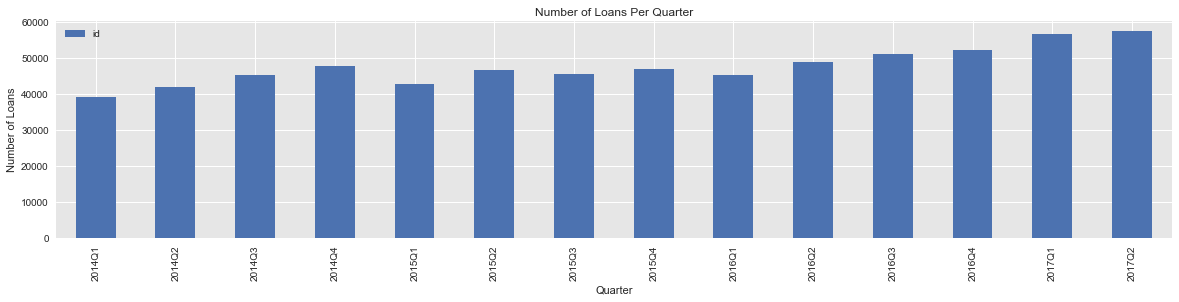

In [13]:
%run narcos/number_loans_per_quarter.py
number_loans_per_quarter(loan_data)

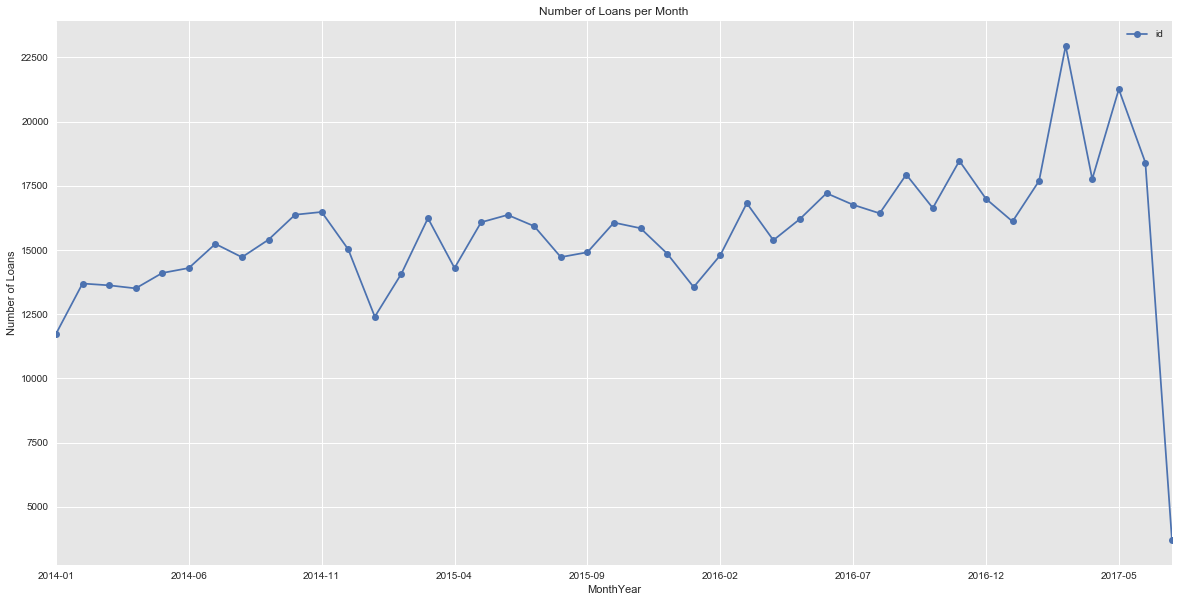

In [14]:
%run narcos/number_loans_per_month.py
number_loans_per_month(loan_data)

## By Gender

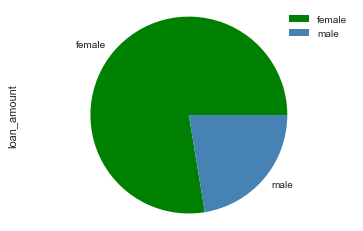

In [15]:
%run narcos/gender_by_loan.py
loans_by_gender(loan_data)

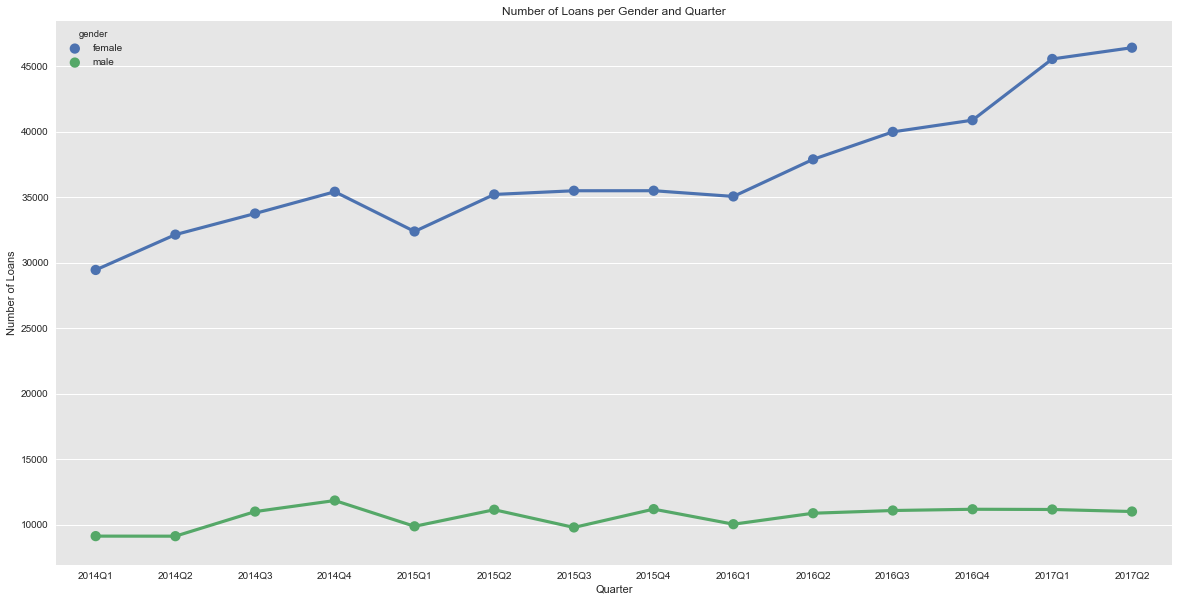

In [16]:
%run narcos/number_loans_per_gender.py
number_loans_per_gender(loan_data)

## Gender Comparison

### Boxplot

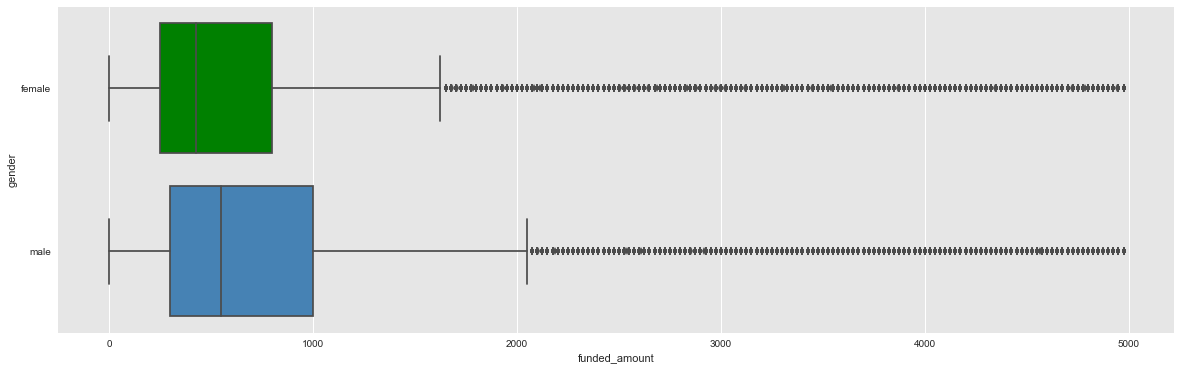

In [17]:
figure, ax = plt.subplots(figsize=(20,6))

sns.boxplot(
    y='gender', 
    x='funded_amount', 
    #palette="Blues",
    orient='h',
    data=loan_data[loan_data['funded_amount'] < 5000],
    ax=ax,
)
ax.artists[0].set_facecolor('green')
ax.artists[1].set_facecolor('steelblue')
plt.show()

### World Cloud By Gender

Wordcloud shows display frequency of keyword. In this dataset, three columns are be ulized: Tags, Activities and Uses.

A very interesting fact found from this viz is that women and men are quiet different. For example, in activities, men are focus on agriculture, farming, and women are in general store, food production etc.

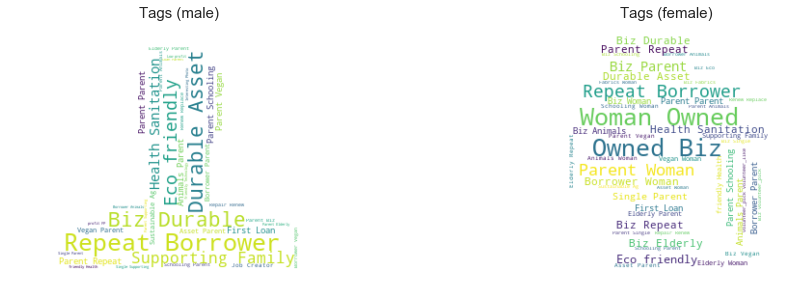

In [18]:
%run narcos/word_cloud.py
plot_all_and_genders_wordcloud(loan_data, 'tags')

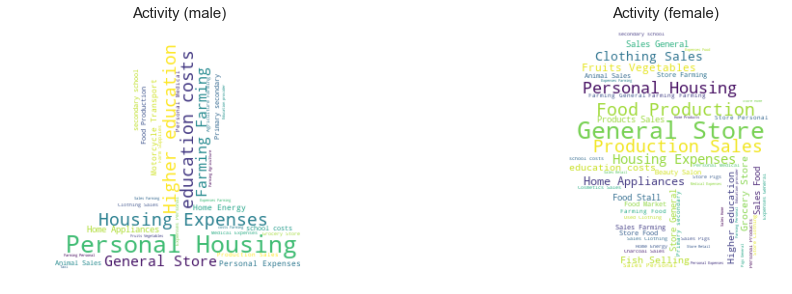

In [19]:
plot_all_and_genders_wordcloud(loan_data, 'activity')

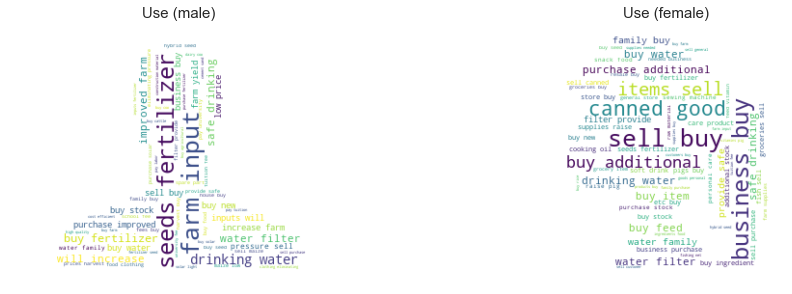

In [20]:
plot_all_and_genders_wordcloud(loan_data, 'use')

## By Country
This visualization provide a very straightfoward on how the loans are distribted geographically. 

From the view, Philipine received most loan in Aisa, Kenya in African and Pragury in American.

In [21]:
import plotly
%run narcos/map.py

py.iplot(plot_map(loan_data, by='sum'), validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~feng443/0 or inside your plot.ly account where it is named 'd3-world-map'


In [22]:
py.iplot(plot_map(loan_data, by='median'), validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~feng443/0 or inside your plot.ly account where it is named 'd3-world-map'


## Country by Loan

                             country  loan_amount  loan_ranked
0                        Afghanistan      14000.0          4.0
1                             Belize     114025.0         10.0
2                             Bhutan      20000.0          6.0
3                              Chile     122650.0         12.0
4                              China     380525.0         18.0
5                      Cote D'Ivoire      50000.0          9.0
6                               Guam       4300.0          1.0
7                            Lesotho     359525.0         16.0
8                         Mauritania      15000.0          5.0
9                            Namibia      32375.0          7.0
10                             Nepal     307625.0         15.0
11                            Panama     273275.0         14.0
12                       Puerto Rico     371400.0         17.0
13  Saint Vincent and the Grenadines      49225.0          8.0
14                           Somalia     225875.0      

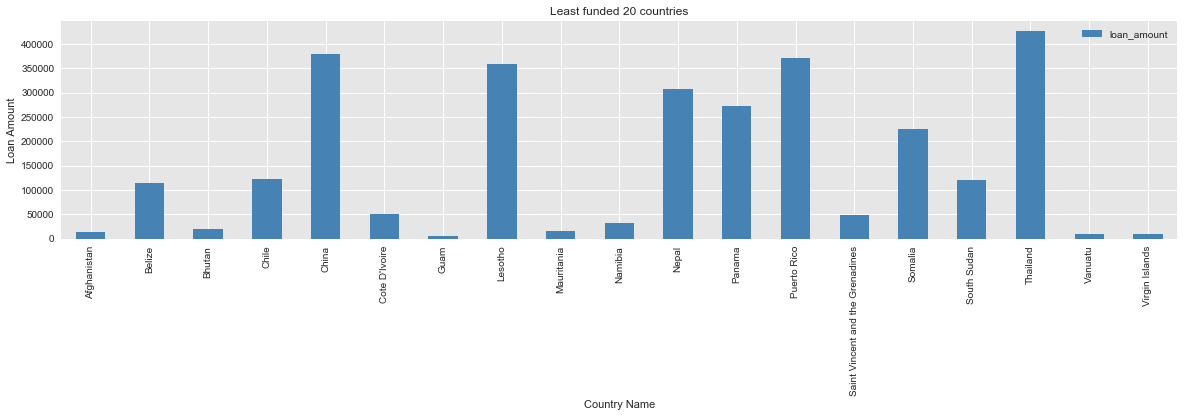

In [23]:
%run narcos/country_by_loan.py
plot_country_by_loan_amount(loan_data)

## Correlation Between Loan vs GDP

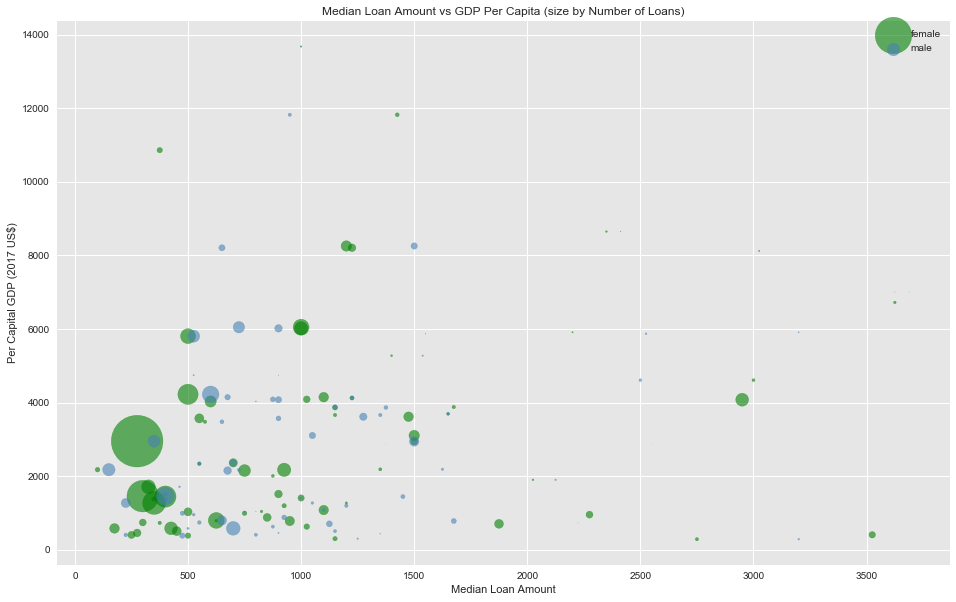

In [24]:
%run narcos/gdp_scatterplot.py
gdp_scatterplot(kiva_data)
# TODO: Add anotation